

---


**<center>Pandit Deendayal Energy University**<br>
**School of Technology**<br>
**Machine Learning Lab (20CP401P)**<br>
**B.Tech-Computer Science & Engineering (Sem-VII)**<br>


Name: Mire Kishorkumar Patel<br>
Roll No.: 19BCP080<br>
Branch: Computer Science & Engineering<br>

Lab 4 Assignment<br>
Implement of K-Nearest Neighbor Algorithm


---


# **MACHINE LEARNING LAB - 4: Implement of K-Nearest Neighbor Algorithm**

**• PROBLEM STATEMENT : Implement of K-Nearest Neighbor Algorithm**

**Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**Load the data**

In [ ]:
data = load_breast_cancer() #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

# data with features
X = data.data

# data class labels
y = data.target

**Print the number of data points, number of features and number of classes in the given data set.**

In [ ]:
n_data_points = len(X)
print(n_data_points, "data points")

n_features = len(X[0])
print(n_features, "features")

n_classes = len(set(y))
print(n_classes, "classes")

569 data points
30 features
2 classes


**Splitting data into Train and test sets with Stratified Sampling using train_test_split()**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

**Data Preprocessing using column standardisation. Use sklearn.preprocessing.StandardScaler().**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

## **Implement Logistic Regression Using Gradient Descent: without using sklearn.**


In this algorithm, $n$ is the total number of datapoints in dataset. 
$\alpha$ is the learning rate to be used in gradient descent. For this work, just fix $\alpha = 0.001$.

The predicted value for data point $x$ is $y_{pred} = σ(w^{T}x + b)$, where $σ$ is a sigmoid function.

**ALGORITHM:**

<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each y_{true},y_{pred}}(y_{true}log(y_{pred})+(1-y_{true})log(1-y_{pred}))$
- for each epoch:

    - for each data point say $x_{i}$ in train:

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = \frac{1}{n}(x_i(σ((w^{(t)})^{T} x_i+b^{t}) - y_i))$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>)

           $ db^{(t)} = \frac{1}{n}(σ((w^{(t)})^{T} x_i+b^{t}) - y_i))$

        - Update weights and intercept usign gradient descent  <br>
        $w^{(t+1)}← w^{(t)} - α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)} - α(db^{(t)}) $
    - predict the output for all test data points with updated weights. (write your function in def prediction())
    - calculate the log loss for train and test data points separately with the updated weights. Store these losses in the lists, train_loss and test_loss.
    - And if you wish, you can compare the previous train loss and the current train loss, if it is not updating, then
        you can stop the training
    -return the updated weights, training and test loss lists.


In [ ]:
n_features = len(X[0])

In [ ]:
def initialize_weights():
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of input vector.
    #initialize bias to zero
    weights = np.zeros((n_features, ))
    bias = 0
    return weights, bias

In [ ]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1 / (1 + np.exp(-z))

In [ ]:
def logloss(y_true, y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    n = y_true.shape[0]
    log_sum = 0

    for i in range(n):
        log_sum += (y_true[i] * np.log(y_pred[i])) + ((1 - y_true[i]) * np.log(1 - y_pred[i]))
    
    return -log_sum / n

In [ ]:
# w should be a vector of size as input data point. Size of w and dw be same.
def gradient_dw(x, y, w, b):
  # In this function, we will compute the gradient w.r.to w
  dw = np.dot(x, sigmoid(np.dot(w.T, x) + b) - y)
  return dw  

In [ ]:
#b should be a scalar value
def gradient_db(x,y,w,b):
  # In this function, we will compute gradient w.r.to b 
  db = sigmoid(np.dot(w.T, x) + b) - y
  return db

**For the prediction, if activation_value > 0.5 then assign label = 1 else label = 0**

In [ ]:
def predict(x, w, b):
  # predicting the class label for a data point.
  predictions = []
  for point in x:
    predictions.append(0 if sigmoid(np.dot(w.T, point) + b) < 0.5 else 1)
  return predictions

In [ ]:
def logistic_regression(epochs=1000, alpha=.001):
  # implement your algorithm
  weights, bias = initialize_weights()
  n = len(X_train_scaled[0])
  train_loss = []
  
  for epoch in range(epochs):
    for x, y in zip(X_train_scaled, y_train):
      weights -= (alpha * gradient_dw(x, y, weights, bias))
      bias -= (alpha * gradient_db(x, y, weights, bias))
    loss = logloss(y_train, sigmoid(np.dot(X_train_scaled, weights) + bias))
    train_loss.append(loss)
  return weights, bias, train_loss

**Plot your train and test loss vs epochs. Plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging**

In [ ]:
weights, bias, train_loss = logistic_regression()

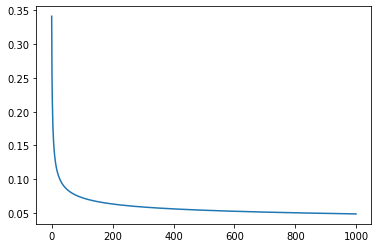

In [ ]:
plt.plot(list(range(1000)), train_loss)











**Compute the final accuracy on test dataset.**

In [ ]:
y_pred = predict(X_test_scaled, weights, bias)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
alpha_list = [0.1, 0.01, 0.001, 0.0001]
acc_list = []

for alpha in alpha_list:
    weights, bias, train_loss = logistic_regression(alpha=alpha)
    y_pred = predict(X_test_scaled, weights, bias)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [ ]:
print(list(zip(alpha_list, acc_list)))

[(0.1, 0.9649122807017544), (0.01, 0.9649122807017544), (0.001, 0.9824561403508771), (0.0001, 0.9912280701754386)]


**BONUS: Train your model with varying values of learning rates say ranging in $[0.1, 0.01, 0.001, 0.0001]$ and plot the performances.**

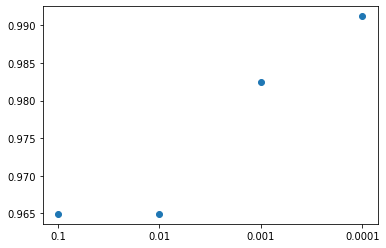

In [ ]:
plt.scatter([str(x) for x in alpha_list], acc_list)





